
# Titanic Survival Prediction Using Machine Learning
# Bismark Osei-Bonsu 
## Machine Learning Final Project
## Student_ID - OS7816374

This notebook builds a **simple and interpretable machine learning model** to predict whether a passenger survived the Titanic disaster.

We focus on clarity. Each step is explained in plain language.

### Features used
- Age
- Sex
- Passenger Class (Pclass)
- Fare


## 1. Import Required Libraries
We import only the libraries needed for data handling, visualization, and modeling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

### Data understanding
##### the dataset used in this project is the Titanic passenger dataset, which contains demographic and travel-related information for individuals aboard the Titanic. The primary objective is to predict passenger survival based on available features. Key variables include age, sex, passenger class, fare paid, number of relatives onboard, and port of embarkation. 

### # Data Preparation

Data preparation involved cleaning and transforming the dataset to make it suitable for machine learning. Missing values in numerical features such as Age were handled using statistical imputation, while columns with excessive missing data or low predictive value were removed. Categorical variables such as Sex and Embarked were encoded into numerical form. Irrelevant identifiers like PassengerId and Name were dropped. The final dataset was scaled and structured to ensure compatibility with machine learning algorithms and to improve model performance

## 2. Load the Dataset
We load the Titanic training dataset. Each row represents one passenger.

In [2]:
titanic_data = pd.read_csv('train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 3. Exploratory Data Analysis (EDA)
Before modeling, we explore the data to understand survival patterns.

### Survival Count
This plot shows how many passengers survived versus how many did not.

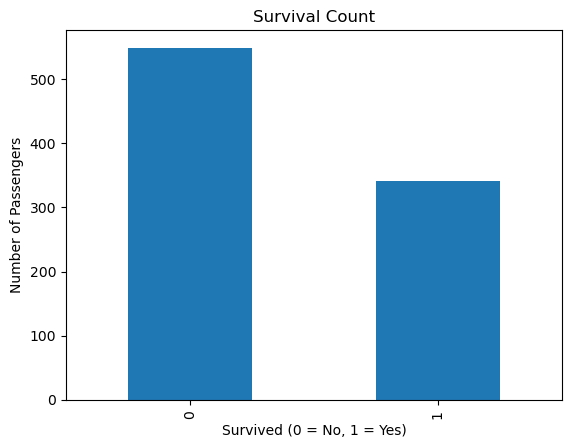

In [3]:
titanic_data['Survived'].value_counts().plot(kind='bar')
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Number of Passengers')
plt.show()

### Survival by Sex
This visualization highlights a strong pattern: women had a much higher survival rate.

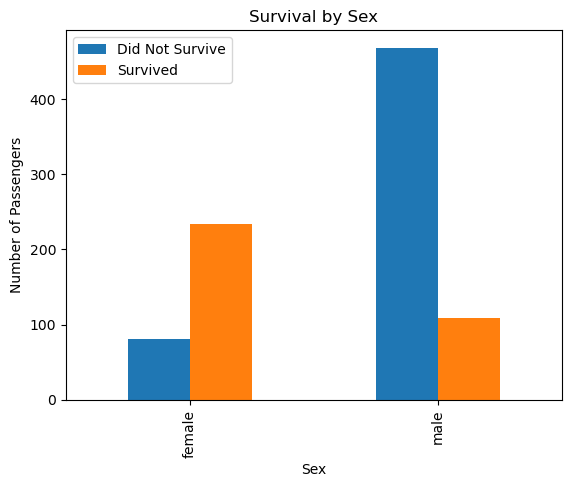

In [4]:
pd.crosstab(titanic_data['Sex'], titanic_data['Survived']).plot(kind='bar')
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.legend(['Did Not Survive', 'Survived'])
plt.show()

### Survival by Passenger Class
Passenger class reflects socioeconomic status. Higher classes had better survival rates.

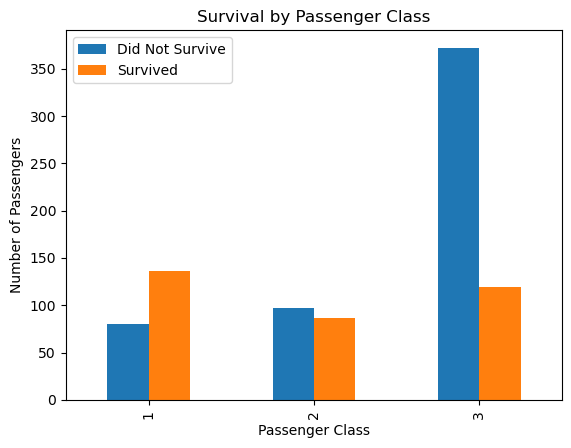

In [5]:
pd.crosstab(titanic_data['Pclass'], titanic_data['Survived']).plot(kind='bar')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.legend(['Did Not Survive', 'Survived'])
plt.show()

## 4. Feature Selection
We select only the features relevant to our prediction task.

In [6]:
features = titanic_data[['Age', 'Sex', 'Pclass', 'Fare']]
target = titanic_data['Survived']

## 5. Data Preprocessing
Machine learning models require clean numerical data.

- Missing ages are filled using the median.
- Sex is converted to numerical form.

In [7]:
features['Age'] = features['Age'].fillna(features['Age'].median())
features['Sex'] = features['Sex'].map({'male': 0, 'female': 1})

/var/folders/nn/vq740qq17vn5hl5890qht89c0000gn/T/ipykernel_95175/3962199018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Age'] = features['Age'].fillna(features['Age'].median())
/var/folders/nn/vq740qq17vn5hl5890qht89c0000gn/T/ipykernel_95175/3962199018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Sex'] = features['Sex'].map({'male': 0, 'female': 1})


## 6. Train-Test Split
We split the data into training and testing sets to evaluate model performance fairly.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target
)

## 7. Feature Scaling
Scaling ensures features contribute equally to the model.

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 8. Model Training
We use Logistic Regression because it is simple, fast, and interpretable.

In [10]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## 9. Model Evaluation
We evaluate the model using accuracy and a classification report.

In [11]:
y_pred = model.predict(X_test_scaled)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       110
           1       0.75      0.68      0.71        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



## 10. Conclusion
the model shows that women and higher-class passengers were more likely to survive, 
This notebook demonstrated a complete and understandable machine learning workflow.
Accuracy: The model achieved 79% accuracy on the test set, which is reasonable for a simple logistic regression using only four features (Age, Sex, Pclass, Fare).

Key takeaways:
- Sex and passenger class are strong predictors of survival.
- Simple models can still provide meaningful insights.
- Clear preprocessing is as important as the model itself.